# Project Overview

## [1. Data Cleaning](#data_cleaning)

In this initial phase, we ensure the dataset's accuracy and reliability through rigorous cleaning, focusing on standardizing column names, handling missing data, addressing duplicates, and managing outliers.

## [2. Univariate Feature Analysis](#univariate_feature_analysis)

Delve into the nuances of individual features in this section, unveiling patterns in demographics, examining wealth distribution across countries/cities, and exploring correlations between economic indicators and the billionaire landscape.

## [3. Multivariate Feature Relationships Analysis](#multivariate_feature_analysis)

Gain a deeper understanding of feature relationships through multivariate analysis. Explore correlations between different features and uncover intricate patterns within the dataset.

## [4. Conclusion](#conclusion)
Summarize key findings derived from the exploratory data analysis, highlighting significant patterns and insights. 


<a id="data_cleaning"></a>
# 1. Data Cleaning
This section covers the crucial step of Data Cleaning in the data analytics process. <br>

**[1.1 Libraries / Reading Data](#libraries_reading-data)**<br>
**[1.2 Discovering Data](#discovering)**<br>
**[1.3 Structuring Data](#structuring)**<br>
**[1.4 Handle Missing Data](#handle_missing)**<br>
**[1.5 Handle Duplicates](#handle_duplicates)**<br>
**[1.6 Handle Outliers](#handle_outliers)**<br>
**[1.7 Save The Cleaned Dataframe](#saving_df)**

<a id="libraries_reading-data"></a>
## 1.1 Libraries / Reading Data

In [250]:
import os
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Set the style for Matplotlib plots
plt.style.use('ggplot')

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

In [251]:
# Read the raw dataframe
df = pd.read_csv("data/raw_data.csv")

<a id="discovering"></a>
## 1.2 Discovering Data

In [252]:
df.head(10)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
5,6,104000,Technology,Bill Gates,67.0,United States,Medina,Microsoft,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
6,7,94500,Media & Entertainment,Michael Bloomberg,81.0,United States,New York,Bloomberg LP,Media & Entertainment,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
7,8,93000,Telecom,Carlos Slim Helu & family,83.0,Mexico,Mexico City,Telecom,Telecom,Mexico,...,3.6,"$1,258,286,717,125",40.2,105.8,75.0,13.1,55.1,1.260140e+08,23.634501,-102.552784
8,9,83400,Diversified,Mukesh Ambani,65.0,India,Mumbai,Diversified,Diversified,India,...,7.7,"$2,611,000,000,000",28.1,113.0,69.4,11.2,49.7,1.366418e+09,20.593684,78.962880
9,10,80700,Technology,Steve Ballmer,67.0,United States,Hunts Point,Microsoft,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891


In [253]:
df.shape

(2640, 35)

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [255]:
df.describe()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


<a id="structuring"></a>
## 1.3 Structuring Data

In [256]:
# Keep column identifiers consistent
df = df.rename(
    columns={
        'finalWorth': 'final_worth_usd',
        'personName': 'person_name', 'countryOfCitizenship': 'country_of_citizenship', 'selfMade': 'wealth_source',
        'birthDate': 'birth_date',
        'lastName': 'last_name',
        'firstName': 'first_name',
        'residenceStateRegion': 'residence_state_region', 'birthYear': 'birth_year',
        'birthMonth': 'birth_month',
        'birthDay': 'birth_day',
        'gdp_country': 'gdp_country_usd',
        'gross_tertiary_education_enrollment': 'gross_tertiary_education_enrollment_country'
        , 'tax_revenue_country_country': 'tax_revenue_country_usd'
    }
)

In [257]:
# Check datatypes for date-columns
print(type(df['birth_date'][0]))
print(type(df['date'][0]))

<class 'str'>
<class 'str'>


In [258]:
# Convert str datatype to datetime object and validate the updated datatype
df['birth_date'] = pd.to_datetime(df['birth_date'])
df['date'] = pd.to_datetime(df['date'])
print(type(df['birth_date'][0]))
print(type(df['date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [259]:
# Dict for replacing bool values in the 'wealth_source' column for better clarity
replace_dict = {
    True: 'Self-Made',
    False: 'Inherited/Unearned'
}
df['wealth_source'] = df['wealth_source'].replace(replace_dict)

In [260]:
# Convert 'gdp_country_in_dollars' from str to numeric after removing '$' and commas
df['gdp_country_usd'] = pd.to_numeric(
    df['gdp_country_usd'].str.strip('$ ').
    str.replace(',', '')
)

In [261]:
# Select only relevant features for the specific data analysis project
filtered_df = df[[
    'rank', 'final_worth_usd', 'person_name', 'organization', 'title', 'residence_state_region', 'state',
    'age', 'country', 'country_of_citizenship', 'city', 'industries', 'wealth_source', 'gender',
    'life_expectancy_country', 'gross_tertiary_education_enrollment_country',
    'gross_primary_education_enrollment_country', 'gdp_country_usd', 'total_tax_rate_country', 'population_country'
]]

**Convert and Format 'final_worth_usd':** Multiply the 'final_worth_usd' column by 1,000,000 to adapt the unit and create a new column, 'final_worth_usd_formatted,' which represents the values in billions for better readability.


In [262]:
# Before adapting the unit
print(filtered_df['final_worth_usd'][6])

94500


In [263]:
filtered_df['final_worth_usd'] = filtered_df['final_worth_usd'].mul(1000000)

In [264]:
def readable_numbers(x):
    """ takes a large number and formats it into K,M,B, to make it more readable"""
    x_abs = abs(x)
    if x_abs >= 1e9:
        s = '{:1.1f}B'.format(x * 1e-9)
    elif (x_abs < 1e9) & (x_abs >= 1e6):
        s = '{:1.1f}M'.format(x * 1e-6)
    else:
        s = '{:1.1f}K'.format(x * 1e-3)
    return s

In [265]:
filtered_df['final_worth_usd']

0       211000000000
1       180000000000
2       114000000000
3       107000000000
4       106000000000
            ...     
2635      1000000000
2636      1000000000
2637      1000000000
2638      1000000000
2639      1000000000
Name: final_worth_usd, Length: 2640, dtype: int64

In [266]:
filtered_df['final_worth_usd_formatted'] = filtered_df['final_worth_usd'].apply(readable_numbers)

In [267]:
filtered_df[['final_worth_usd', 'final_worth_usd_formatted']].sort_values(by='final_worth_usd', ascending=True)

,final_worth_usd,final_worth_usd_formatted
2639,1000000000,1.0B
2565,1000000000,1.0B
2566,1000000000,1.0B
2567,1000000000,1.0B
2568,1000000000,1.0B
...,...,...
4,106000000000,106.0B
3,107000000000,107.0B
2,114000000000,114.0B
1,180000000000,180.0B


In [268]:
# After converting + formatting
print(filtered_df['final_worth_usd'][6])
print(filtered_df['final_worth_usd_formatted'][6])

94500000000
94.5B


<a id="handle_missing"></a>
## 1.4 Handle missing data

##### Checking for Zero Values
Before proceeding with handling missing data, it's crucial to check for zero values, as they could potentially indicate missing or undefined data.

In [269]:
# Check for zero values in the dataframe
(df == 0).sum()

rank                                           0
final_worth_usd                                0
category                                       0
person_name                                    0
age                                            0
country                                        0
city                                           0
source                                         0
industries                                     0
country_of_citizenship                         0
organization                                   0
wealth_source                                  0
status                                         0
gender                                         0
birth_date                                     0
last_name                                      0
first_name                                     0
title                                          0
date                                           0
state                                          0
residence_state_regi

If there are numeric columns with a substantial number of zeros, it's essential to investigate whether these zeros represent genuine data or if they are indicative of missing information. In the latter case, it's advisable to replace these zeros with NaN values to ensure consistent handling of missing data in subsequent steps.
For example:
```python
df = df.replace(0, np.nan)

This step ensures a thorough examination of zero values and provides a standardized approach for addressing potential missing data. Once this is done, you can proceed with the subsequent steps of handling missing values in your dataset.

In [270]:
# Function to get an overview of the missing data per column
def get_missing_data_rate(input_df: pd.DataFrame):
    total = input_df.isna().sum().sort_values(ascending=False)
    percent = (input_df.isna().sum() / input_df.isna().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Missing Data Total', 'Missing Data Percent'])
    return missing_data

In [271]:
get_missing_data_rate(df)

,Missing Data Total,Missing Data Percent
organization,2315,0.876894
title,2301,0.871591
residence_state_region,1893,0.717045
state,1887,0.714773
cpi_change_country,184,0.069697
cpi_country,184,0.069697
tax_revenue_country_usd,183,0.069318
total_tax_rate_country,182,0.068939
life_expectancy_country,182,0.068939
gross_tertiary_education_enrollment_country,182,0.068939


##### Drop columns when more than 15 % of the data is missing

In [272]:
filtered_df = filtered_df.drop(columns=['title', 'organization', 'residence_state_region', 'state'])

In [273]:
get_missing_data_rate(filtered_df)

,Missing Data Total,Missing Data Percent
life_expectancy_country,182,0.068939
total_tax_rate_country,182,0.068939
gross_tertiary_education_enrollment_country,182,0.068939
gross_primary_education_enrollment_country,181,0.068561
population_country,164,0.062121
gdp_country_usd,164,0.062121
city,72,0.027273
age,65,0.024621
country,38,0.014394
rank,0,0.000000


##### Handling Remaining Missing Data

When dealing with remaining missing data in your dataset, several options are available:

1. **Drop Rows:**
   - You can choose to drop the remaining rows with missing data. This is a straightforward approach but might result in a loss of information.

2. **Fill NaN Entries for Categorical Columns:**
   - For categorical columns, consider filling NaN entries with the mode (the most frequent value) to retain information without significant data loss.

3. **Fill NaN Entries for Numerical Columns:**
   - For numerical columns, filling NaN entries with the mean or median of the specific column is an option. Use the mean if the data is not skewed and does not contain outliers. If skewness or outliers are present, the median is a more robust fill option.

4. **Consideration for Outliers:**
   - It's important to be mindful of outliers in the data. If your dataset contains skewed data or outliers, favor using the median as the NaN-fill option to avoid the influence of extreme values.

5. **Avoid Biased Data:**
   - To ensure the integrity of your analysis and avoid biased results, consider dropping the remaining rows with missing data. This helps maintain the overall quality and fairness of your dataset.

Choose the appropriate strategy based on the nature and characteristics of your data, taking into account the potential impact on the analysis and results.


In [274]:
# Check rows with missing data
filtered_df[filtered_df.isna().any(axis=1)]

,rank,final_worth_usd,person_name,age,country,country_of_citizenship,city,industries,wealth_source,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_usd,total_tax_rate_country,population_country,final_worth_usd_formatted
32,33,38000000000,Li Ka-shing,94.0,Hong Kong,Hong Kong,NaN,Diversified,Self-Made,M,NaN,NaN,NaN,NaN,NaN,NaN,38.0B
46,47,29500000000,Lee Shau Kee,95.0,Hong Kong,Hong Kong,Hong Kong,Real Estate,Self-Made,M,NaN,NaN,NaN,NaN,NaN,NaN,29.5B
85,86,18900000000,Eyal Ofer,72.0,Monaco,Israel,Monte Carlo,Diversified,Inherited/Unearned,M,NaN,NaN,NaN,7.184844e+09,NaN,38964.0,18.9B
107,108,15800000000,Karl Albrecht Jr. & family,NaN,Germany,Germany,NaN,Fashion & Retail,Inherited/Unearned,M,80.9,70.2,104.0,3.845630e+12,48.8,83132799.0,15.8B
108,108,15800000000,Beate Heister,NaN,NaN,Germany,NaN,Fashion & Retail,Inherited/Unearned,F,NaN,NaN,NaN,NaN,NaN,NaN,15.8B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,2540,1000000000,Réal Plourde,NaN,Canada,Canada,Westmount,Fashion & Retail,Self-Made,M,81.9,68.9,100.9,1.736426e+12,24.5,36991981.0,1.0B
2610,2540,1000000000,Vera Rechulski Santo Domingo,74.0,Bermuda,Brazil,NaN,Food & Beverage,Inherited/Unearned,F,NaN,NaN,NaN,NaN,NaN,NaN,1.0B
2626,2540,1000000000,Masaru Wasami,77.0,NaN,Japan,NaN,Logistics,Self-Made,M,NaN,NaN,NaN,NaN,NaN,NaN,1.0B
2629,2540,1000000000,Toto Wolff,51.0,Monaco,Austria,NaN,Sports,Self-Made,M,NaN,NaN,NaN,7.184844e+09,NaN,38964.0,1.0B


In [275]:
filtered_df.isna().sum().max()

182

In [276]:
# Drop remaining NaN-Enry rows
filtered_df = filtered_df.dropna(axis=0)

In [277]:
# Validate that there's no missing data left
filtered_df.isna().sum().max()

0

<a id="handle_duplicates"></a>
## 1.5 Handle Duplicates

Duplicate entries in a dataset can introduce inconsistencies and skew analysis results.
You begin by identifying and detecting duplicate rows in your dataset. 

In [278]:
# Check for exact duplicated rows in the df
filtered_df.loc[filtered_df.duplicated()]

,rank,final_worth_usd,person_name,age,country,country_of_citizenship,city,industries,wealth_source,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_usd,total_tax_rate_country,population_country,final_worth_usd_formatted


In [279]:
# Check for feature-specific duplicated rows based on 'person_name' and 'country'
filtered_df.loc[filtered_df.duplicated(subset=['person_name', 'country'])]

,rank,final_worth_usd,person_name,age,country,country_of_citizenship,city,industries,wealth_source,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_usd,total_tax_rate_country,population_country,final_worth_usd_formatted
2112,2020,1400000000,Wang Yanqing & family,76.0,China,China,Weihai,Manufacturing,Inherited/Unearned,F,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09,1.4B
2317,2259,1200000000,Li Li,59.0,China,China,Shenzhen,Healthcare,Self-Made,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09,1.2B


In [280]:
# Investigate feature-specific duplicates for 'person_name'
filtered_df.query('person_name == "Li Li" or person_name.str.startswith("Wang Yanqing")')

,rank,final_worth_usd,person_name,age,country,country_of_citizenship,city,industries,wealth_source,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_usd,total_tax_rate_country,population_country,final_worth_usd_formatted
785,766,3700000000,Wang Yanqing & family,56.0,China,China,Wuxi,Manufacturing,Self-Made,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09,3.7B
1045,1027,2900000000,Li Li,57.0,China,China,Changsha,Healthcare,Self-Made,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09,2.9B
2112,2020,1400000000,Wang Yanqing & family,76.0,China,China,Weihai,Manufacturing,Inherited/Unearned,F,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09,1.4B
2317,2259,1200000000,Li Li,59.0,China,China,Shenzhen,Healthcare,Self-Made,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09,1.2B


After identifying duplicate rows, the next steps involve deciding whether to drop or maintain them, considering the potential consequences of data loss. In this case, it's observed that for 'Wang Yanqing & family' and 'Li Li,' there are entries with slight differences in gender and age, suggesting they might not belong to the same person.

To demonstrate how to drop potentially feature-specific duplicated rows, the following code can be used:

In [281]:
# Drop potentially feature-specific duplicated rows
filtered_df_no_duplicates = filtered_df.loc[~filtered_df.duplicated(subset=['person_name', 'country'])] \
    .reset_index(drop=True).copy()

In [282]:
# Verify that dropping potentially duplicated rows worked properly
filtered_df_no_duplicates.query('person_name == "Li Li" or person_name.str.startswith("Wang Yanqing")')

,rank,final_worth_usd,person_name,age,country,country_of_citizenship,city,industries,wealth_source,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_usd,total_tax_rate_country,population_country,final_worth_usd_formatted
731,766,3700000000,Wang Yanqing & family,56.0,China,China,Wuxi,Manufacturing,Self-Made,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09,3.7B
971,1027,2900000000,Li Li,57.0,China,China,Changsha,Healthcare,Self-Made,M,77.0,50.6,100.2,1.991000e+13,59.2,1.397715e+09,2.9B


<a id="handle_outliers"></a>
## 1.6 Handle outliers

#### Handling Outliers in Final Worth Distribution

Outliers, or extreme values, in the final worth distribution of billionaire data can introduce biases and distort the overall analysis. It is essential to address these outliers to ensure the analysis accurately reflects the underlying patterns in the data. One widely employed method is the Interquartile Range (IQR) approach, involving the following steps:

***Calculate Percentiles:***
Compute the 25th (Q1) and 75th (Q3) percentiles of the final worth values in the dataset.

***Calculate IQR:***
Determine the Interquartile Range (IQR) by subtracting Q1 from Q3.

***Define Upper and Lower Thresholds:***
Establish upper and lower thresholds for identifying outliers, typically considering values outside 1.5 times the IQR as potential outliers.

***Filter Outliers Using Boolean Masks:***
Use boolean masks to filter the dataframe, retaining only rows where the final worth is within the defined upper and lower limits.

***Analyze Results:***
Examine the impact of outlier handling on central tendency measures, such as mean and median, to understand the distribution's revised characteristics.

In [283]:
print(f"Final Worth Mean before handling outliers: {readable_numbers(filtered_df['final_worth_usd'].mean())}")
print(f"Final Worth Median before handling outliers: {readable_numbers(filtered_df['final_worth_usd'].median())}")

Final Worth Mean before handling outliers: 4.8B
Final Worth Median before handling outliers: 2.4B


In [284]:
# List to store all generated plots
all_plots = []

In [285]:
# Define a function for boxplot creation for better reusability
def create_box_plot(input_df, input_title, show_fliers):
    plt.figure(figsize=(14, 6))
    palette = sns.color_palette('bright')
    boxplot = sns.boxplot(
        data=input_df,
        x='final_worth_usd',
        y='industries',
        showfliers=show_fliers,
        palette=palette
    )
    boxplot.set(
        xlabel='Final Worth ($)',
        ylabel='Industry'
    )
    # Format the x-axis tick labels
    boxplot.set_xticklabels([readable_numbers(x) for x in boxplot.get_xticks()])
    plt.title(label=input_title, fontsize=18, fontweight='bold')
    plt.show()
    return boxplot

Usually you can check for outliers through a boxplot related to the specific numerical (x) and a dependent categorical (y) feature;
But this type of dataset is very susceptible to outliers because of the wide range of billionaires' wealth 

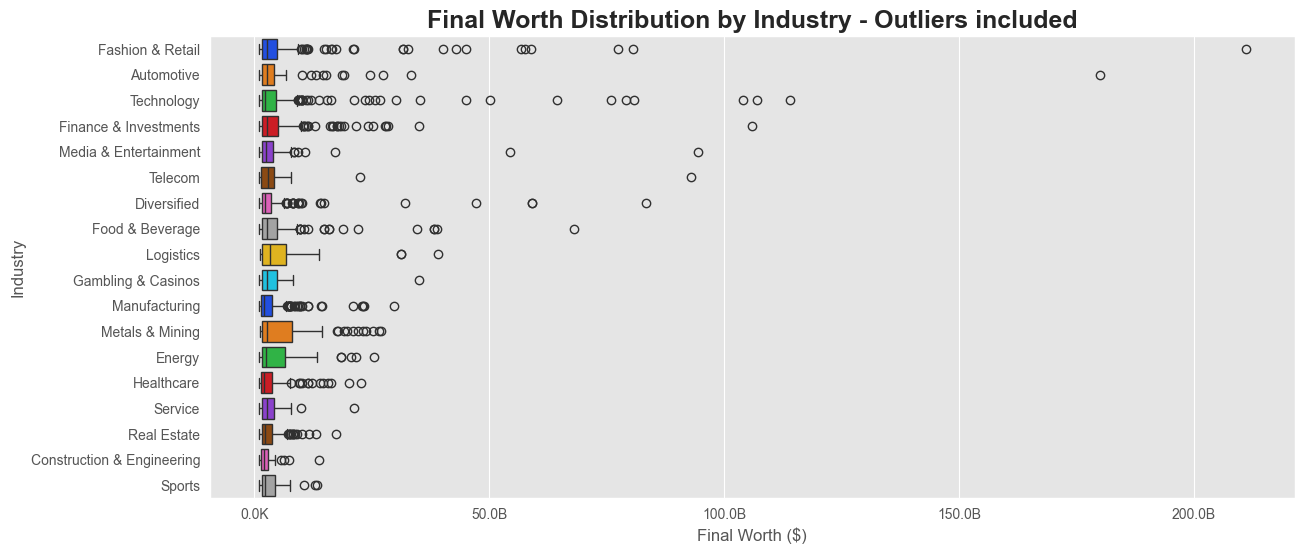

In [286]:
# Outliers included
boxplot_title_outliers = "Final Worth Distribution by Industry - Outliers included"
file_name_1_6_1 = "Final_Worth_Distribution_by_Industry_Outliers_included_M.png"
boxplot_outliers_included = create_box_plot(filtered_df, boxplot_title_outliers, show_fliers=True)
all_plots.append((boxplot_outliers_included, file_name_1_6_1))

##### To get a better view of the final worth distribution we exclude the outliers

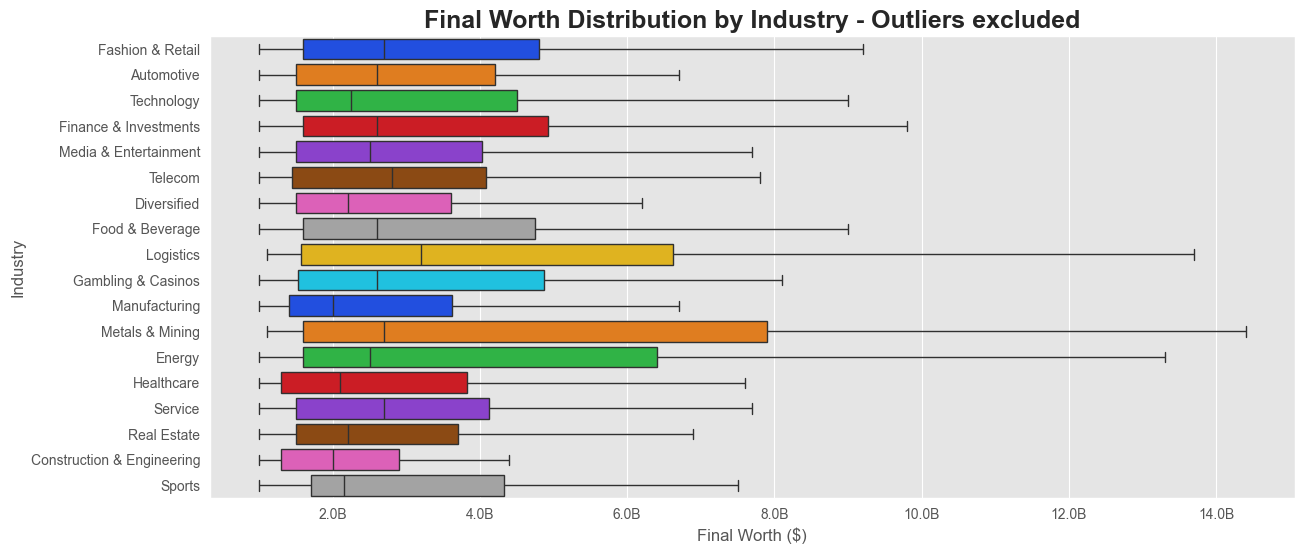

In [287]:
boxplot_title_no_outliers = "Final Worth Distribution by Industry - Outliers excluded"
file_name_1_6_2 = "Final_Worth_Distribution_by_Industry_Outliers_excluded_M.png"
boxplot_outliers_excluded = create_box_plot(filtered_df, boxplot_title_no_outliers, show_fliers=False)
all_plots.append((boxplot_outliers_excluded, file_name_1_6_2))

##### Here starts the IQR approach

In [288]:
# Calculate 25th percentile of annual strikes
percentile25 = filtered_df['final_worth_usd'].quantile(0.25)

# Calculate 75th percentile of annual strikes
percentile75 = filtered_df['final_worth_usd'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Upper limit is: ', readable_numbers(upper_limit))
print('Lower limit is: ', readable_numbers(lower_limit))

Upper limit is:  8.5B
Lower limit is:  -2.7B


##### Boolean masks were used to filter the dataframe so it only contained rows where the number of strikes was less than the lower limit / more than the upper limit

In [289]:
print(len(filtered_df[filtered_df['final_worth_usd'] < lower_limit]))
print(len(filtered_df[filtered_df['final_worth_usd'] > upper_limit]))

0
227


In [290]:
mask = (filtered_df['final_worth_usd'] >= lower_limit) & (filtered_df['final_worth_usd'] <=
                                                          upper_limit)
outliers_handled = filtered_df[mask].copy()
print(f"Final Worth Mean after handling outliers: {readable_numbers(outliers_handled['final_worth_usd'].mean())}")
print(f"Final Worth Median after handling outliers: {readable_numbers(outliers_handled['final_worth_usd'].median())}")

Final Worth Mean after handling outliers: 2.8B
Final Worth Median after handling outliers: 2.2B


As shown, the data is now less widely dispersed and there are way less outliers than before

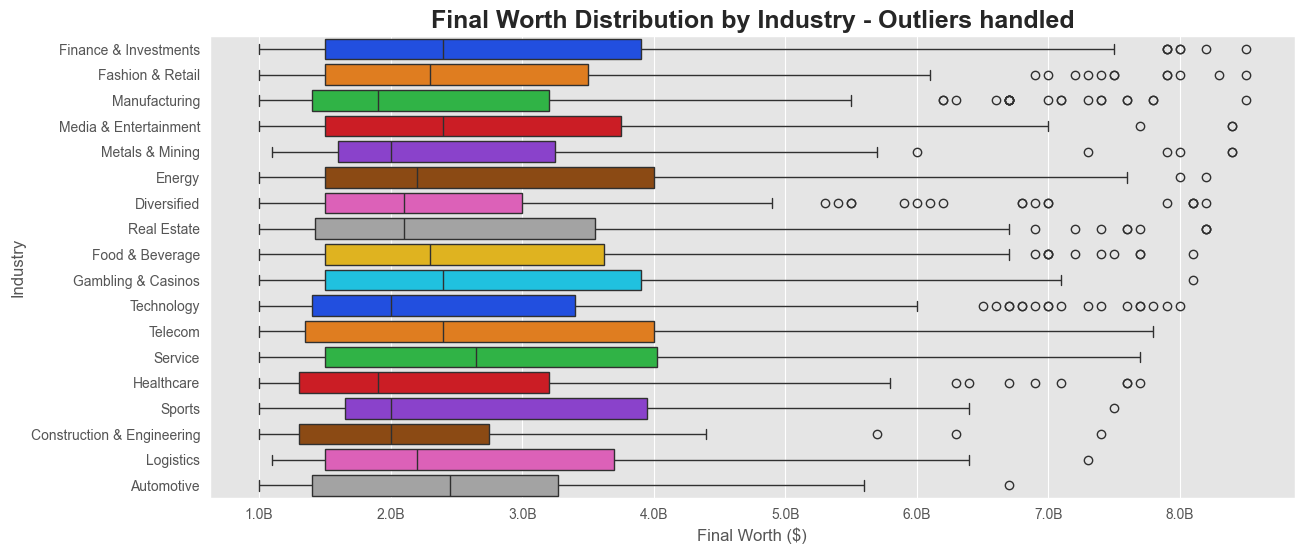

In [291]:
boxplot_title_outliers_handled = "Final Worth Distribution by Industry - Outliers handled"
file_name_1_6_3 = "Final_Worth_Distribution_by_Industry_Outliers_handled_M.png"
boxplot_outliers_handled = create_box_plot(outliers_handled, boxplot_title_outliers_handled, show_fliers=True)
all_plots.append((boxplot_outliers_handled, file_name_1_6_3))

<a id="saving_df"></a>
## 1.7 Save The Cleaned Dataframe

#### Not to be forgotten
While handling outliers using the IQR method is a common practice in exploratory data analysis (EDA), it is important to be aware of its potential drawbacks. Removing outliers can lead to data loss and bias, which will affect the overall representativeness of the analysis. The decision on how to deal with outliers (delete, reassign or leave) should be made carefully, taking into account the specific characteristics of the dataset and the intended use, especially in the context of EDA without subsequent development of predictive machine learning models. Whether outliers are retained, reassigned or removed depends on the type and size of the dataset and the objectives of the analysis. It is crucial to balance the benefits of outlier correction with the potential drawbacks to ensure a thoughtful and context-aware approach.

For future EDA, you should use the original filtered df (without outlier handling), because outliers aren't systematic data errors here that could influence our analysis in a bad way; they are a valuable part of the overall df.

In [292]:
filtered_df.to_csv("data/cleaned_data.csv", index=False)

In [293]:
outliers_handled.to_csv("data/cleaned_data_outliers_handled.csv", index=False)

<a id="univariate_feature_analysis"></a>
# 2. Univariate Feature Analysis
Explore the data analytics process of Univariate Feature Analysis in this section.

**[2.1 Feature: Final Worth | Hist-Chart](#final_worth_hist)** <br>
**[2.2 Feature: Country | Bar-Plot](#country_bar)** <br>
**[2.3 Feature: City | Bar-Plot](#city_bar)** <br>
**[2.4 Feature: Industries | BarH-Plot](#industries_barh)** <br>
**[2.5 Feature: Age | Hist-Chart](#age_hist)** <br>
**[2.6 Feature: Gender | Pie-Chart](#gender_pie)** <br>
**[2.7 Feature: Wealth-Source | Pie-Chart](#wealth_source_pie)**

In [294]:
df = pd.read_csv("data/cleaned_data.csv")
df_outliers_handled = pd.read_csv("data/cleaned_data_outliers_handled.csv")

<a id="final_worth_hist"></a>
## 2.1 Feature: Final Worth | Hist-Chart

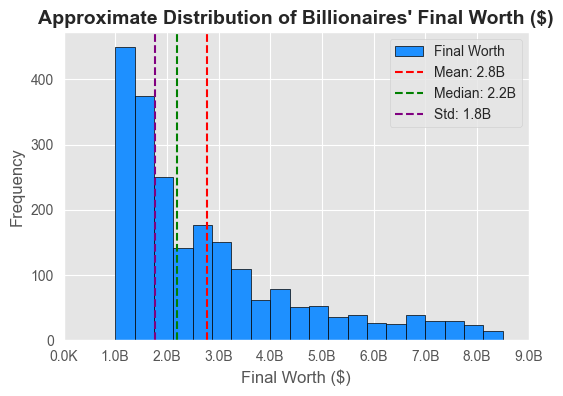

In [295]:
# Plot histogram
hist_chart_2_1 = df_outliers_handled['final_worth_usd'].plot(kind='hist',
                                                             bins=20,
                                                             figsize=(6, 4),
                                                             color='dodgerblue',
                                                             edgecolor='black',
                                                             label='Final Worth')

# Set title and labels
plt.title("Approximate Distribution of Billionaires' Final Worth ($)",
          fontsize=14,
          fontweight="bold")
plt.xlabel('Final Worth ($)')

# Set ticks and labels
ticks = hist_chart_2_1.get_xticks()
hist_chart_2_1.set_xticks(ticks)
hist_chart_2_1.set_xticklabels([readable_numbers(x) for x in ticks])

# Calculate statistics
mean_final_worth, median_final_worth, std_final_worth = np.mean(df_outliers_handled['final_worth_usd']), np.median(
    df_outliers_handled['final_worth_usd']), np.std(df_outliers_handled['final_worth_usd'])

# Add vertical lines for statistics
for stat, color, label in zip(
        [mean_final_worth, median_final_worth, std_final_worth],
        ['r', 'g', 'purple'],
        ['Mean', 'Median', 'Std']):
    hist_chart_2_1.axvline(stat, color=color, linestyle='dashed', label=f'{label}: {readable_numbers(stat)}')

# Display legend
hist_chart_2_1.legend()

file_name_2_1 = "Approximate_Distribution_of_Billionaires_Final_Worth_Worldwide_U.png"
all_plots.append((hist_chart_2_1, file_name_2_1))
plt.show()

<a id="country_bar"></a>
## 2.2 Feature: Country | Bar-Plot

In [296]:
len(df['country'].unique())

65

In [297]:
country_counts = df['country'].value_counts()
country_counts

country
United States    750
China            504
India            157
Germany           87
Russia            79
                ... 
Portugal           1
Georgia            1
Colombia           1
Uzbekistan         1
Armenia            1
Name: count, Length: 65, dtype: int64

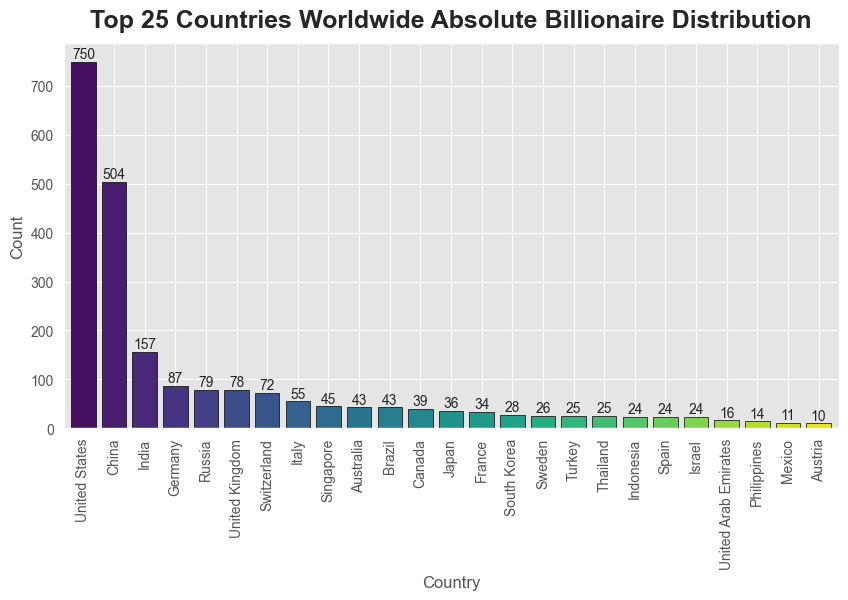

In [298]:
country_counts_top_25 = country_counts.head(25).sort_values(ascending=False)
# Use a seaborn color palette
colors = sns.color_palette('viridis', len(country_counts_top_25))

bar_plot_2_2 = country_counts_top_25.plot(kind='bar',
                                          figsize=(10, 5),
                                          color=colors,
                                          edgecolor='black',
                                          width=0.8)

plt.title('Top 25 Countries Worldwide Absolute Billionaire Distribution',
          fontsize=18,
          fontweight='bold',
          y=1.02)
bar_plot_2_2.set_ylabel('Count')
bar_plot_2_2.set_xlabel('Country')
for i, count in enumerate(country_counts_top_25):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

file_name_2_2 = "Top_25_Countries_Worldwide_Absolute_Billionaire_Distribution_U.png"
all_plots.append((bar_plot_2_2, file_name_2_2))
plt.show()

<a id="city_bar"></a>
## 2.3 Feature: City | Bar-Plot

In [299]:
len(df['city'].unique())

711

In [300]:
city_counts = df['city'].value_counts()
city_counts

city
New York       99
Beijing        66
Shanghai       60
Moscow         60
London         59
               ..
Brownsville     1
Montpellier     1
Santa Clara     1
Stuttgart       1
Makati          1
Name: count, Length: 711, dtype: int64

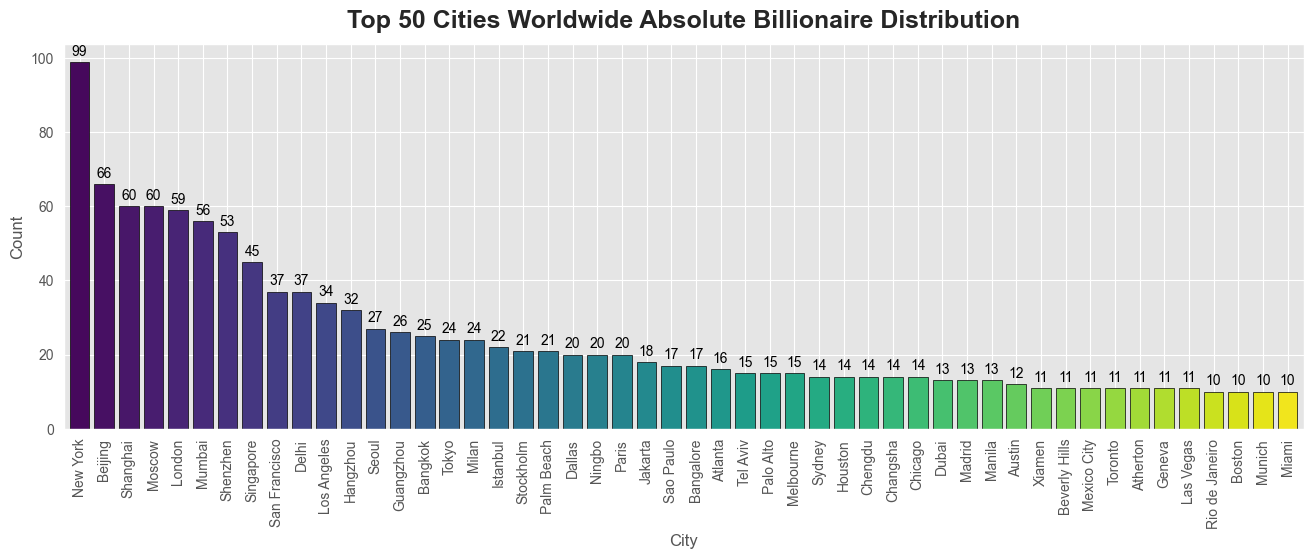

In [301]:
city_counts_top_50 = city_counts.head(50)
# Use a seaborn color palette
colors = sns.color_palette('viridis', len(city_counts_top_50))

# Create the bar plot
bar_plot_2_3 = city_counts_top_50.plot(kind='bar',
                                       figsize=(16, 5),
                                       color=colors,
                                       edgecolor='black',
                                       width=0.8)

# Add title and labels
plt.title("Top 50 Cities Worldwide Absolute Billionaire Distribution",
          fontsize=18,
          fontweight='bold',
          y=1.02)
bar_plot_2_3.set_ylabel('Count')
bar_plot_2_3.set_xlabel('City')

# Add bar labels with annotations
for i, count in enumerate(city_counts_top_50):
    bar_plot_2_3.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10, color='black')

file_name_2_3 = "Top_50_Cities_Worldwide_Absolute_Billionaire_Distribution_U.png"
all_plots.append((bar_plot_2_3, file_name_2_3))
plt.show()

<a id="industries_barh"></a>
## 2.4 Feature: Industries | BarH-Plot

In [302]:
industry_counts = df['industries'] \
    .value_counts().sort_values(ascending=False)
industry_counts

industries
Finance & Investments         336
Technology                    290
Manufacturing                 288
Fashion & Retail              242
Healthcare                    188
Food & Beverage               187
Diversified                   173
Real Estate                   156
Energy                         93
Media & Entertainment          84
Automotive                     69
Metals & Mining                69
Service                        48
Construction & Engineering     41
Sports                         38
Logistics                      32
Telecom                        28
Gambling & Casinos             22
Name: count, dtype: int64

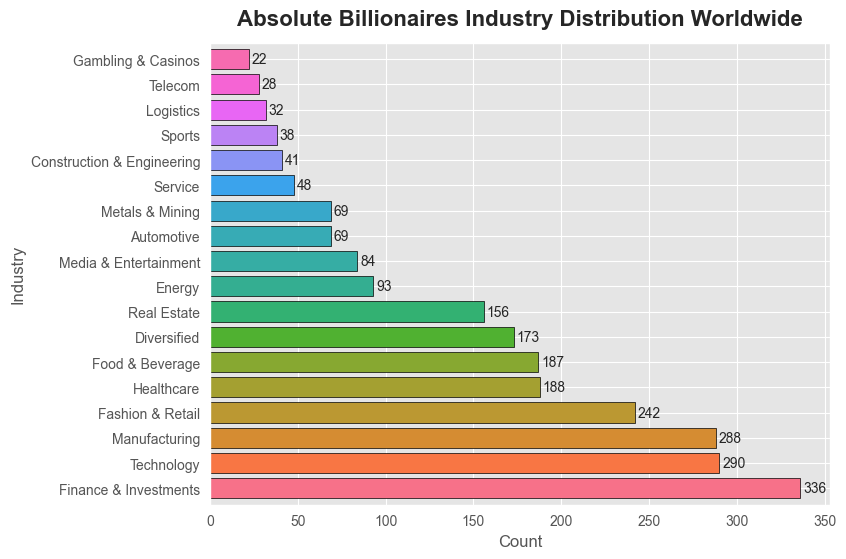

In [303]:
# Use a seaborn color palette
colors = sns.color_palette('husl', len(industry_counts))

# Create the horizontal bar plot
barh_plot_2_4 = industry_counts.plot(kind='barh', figsize=(8, 6), color=colors, edgecolor='black', width=0.8)

plt.title('Absolute Billionaires Industry Distribution Worldwide',
          fontsize=16,
          fontweight='bold',
          y=1.02)
barh_plot_2_4.set_xlabel('Count')
barh_plot_2_4.set_ylabel('Industry')

for i, count in enumerate(industry_counts):
    plt.text(count + 1.5, i, str(count), ha='left', va='center')

file_name_2_4 = "Absolute_Billionaires_Industry_Distribution_Worldwide_U.png"
all_plots.append((barh_plot_2_4, file_name_2_4))
plt.show()

<a id="age_hist"></a>
## 2.5 Feature: Age | Hist-Chart

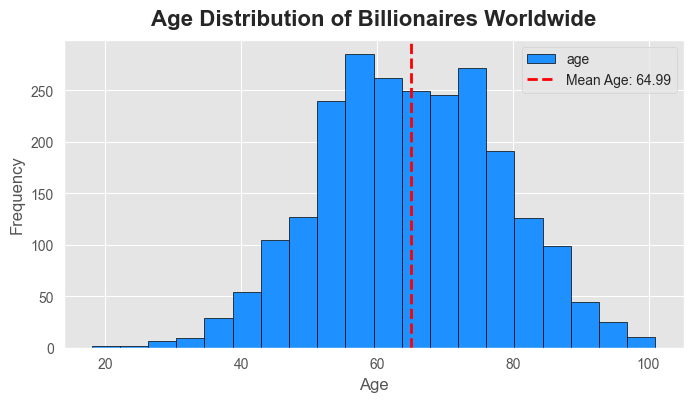

In [304]:
# Create the histogram plot
hist_chart_2_5 = df['age'].plot(kind='hist',
                                bins=20,
                                figsize=(8, 4),
                                color='dodgerblue',
                                edgecolor='black')

# Customize the plot
hist_chart_2_5.set_title('Age Distribution of Billionaires Worldwide',
                         fontsize=16,
                         fontweight='bold',
                         y=1.02)
hist_chart_2_5.set_xlabel('Age')

# Add vertical line for mean age
mean_age = df['age'].mean()
hist_chart_2_5.axvline(mean_age,
                       color='red',
                       linestyle='dashed',
                       linewidth=2,
                       label=f'Mean Age: {mean_age:.2f}')
hist_chart_2_5.legend()

file_name_2_5 = "Age_Distribution_of_Billionaires_Worldwide_U.png"
all_plots.append((hist_chart_2_5, file_name_2_5))
plt.show()

<a id="gender_pie"></a>
## 2.6 Feature: Gender | Pie-Chart

In [305]:
def create_pie_chart(data_val_counts, col_palette, input_title, feature_name):
    ax = data_val_counts.plot(kind='pie',
                              autopct='%1.1f%%',
                              colors=col_palette,
                              wedgeprops=dict(width=0.4),
                              textprops=dict(fontsize=11, fontweight='bold'),
                              startangle=90,
                              shadow=True,
                              explode=(0, 0.1),
                              pctdistance=0.8
                              )
    
    plt.text(0, 0, feature_name, ha='center', va='center', fontsize=12, fontweight='bold', color='black')

    # Customize the plot
    plt.title(input_title,
              fontweight='bold',
              fontsize=16,
              y=1.05)
    ax.set_ylabel('')

    # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.axis('equal')

    # Save and show the plot
    plt.show()
    return ax

In [306]:
gender_counts = df['gender'].value_counts()
gender_counts

gender
M    2103
F     281
Name: count, dtype: int64

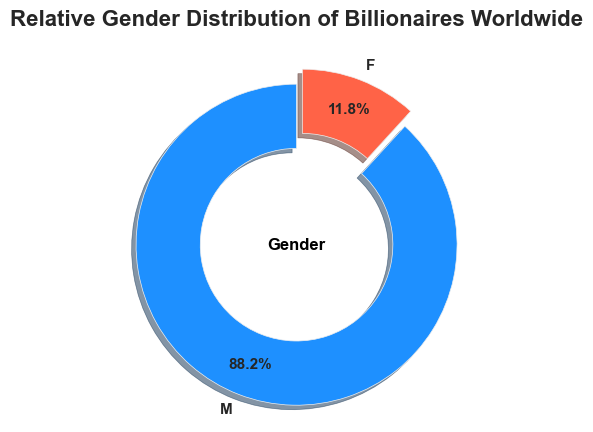

In [307]:
colors = ['dodgerblue', 'tomato']
gender_title = "Relative Gender Distribution of Billionaires Worldwide"
file_name_5 = "Relative_Gender_Distribution_of_Billionaires_Worldwide.png"
pie_chart_gender = create_pie_chart(gender_counts, colors, gender_title, feature_name="Gender")
file_name_2_6 = "Relative_Gender_Distribution_of_Billionaires_Worldwide_U.png"
all_plots.append((pie_chart_gender, file_name_2_6))

<a id="wealth_source_pie"></a>
## 2.7 Feature: Wealth-Source | Pie-Chart

In [308]:
wealth_source_counts = df['wealth_source'].value_counts()
wealth_source_counts

wealth_source
Self-Made             1679
Inherited/Unearned     705
Name: count, dtype: int64

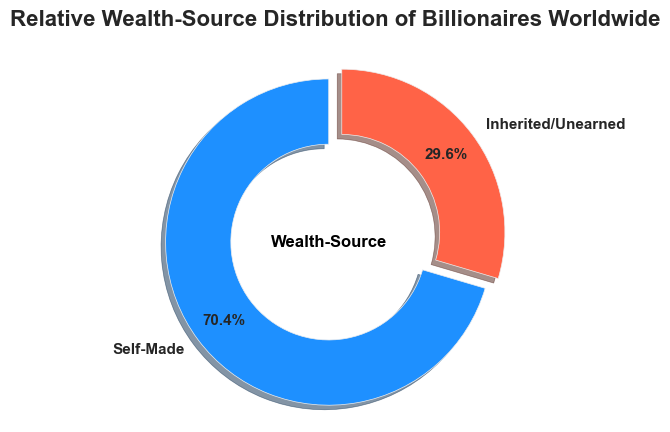

In [309]:
wealth_source_title = "Relative Wealth-Source Distribution of Billionaires Worldwide"
pie_chart_wealth_source = create_pie_chart(wealth_source_counts, colors, wealth_source_title, feature_name="Wealth-Source")
file_name_2_7 = "Relative_Wealth_Source_Distribution_of_Billionaires_Worldwide_U.png"
all_plots.append((pie_chart_wealth_source, file_name_2_7))

<a id="multivariate_feature_analysis"></a>
# 3. Multivariate Feature Relationships Analysis

In this section we will go through the data analytics process of Multivariate Analysis to get a better understanding of the Feature-Relationships

To skip directly to to particular parts, use the following links: <br>
3.1 **[Final Worth vs. Age by Gender | Scatterplot](#final_worth_age_gender_scatter)** <br>
3.2 **[Billionaires Count by Top Countries Worldwide and Wealth Source | Histogram](#country_wealth_source_hist)** <br>
3.3 **[Billionaires per Industry, Age and Gender | Violin Plot](#industries_age_gender_violin)** <br>
3.4 **[International Billionaire Average Final Worth by Global Region and Industry | Facet Grid](#avg_final_worth_global_region_industries_facet)** <br>
3.5 **[Worldwide Billionaire Correlations between Economic and Demographic Indicators | Heatmap](#corr_heatmap)**

<a id="final_worth_age_gender_scatter"></a>
## 3.1 Final Worth vs. Age by Gender | Scatterplot

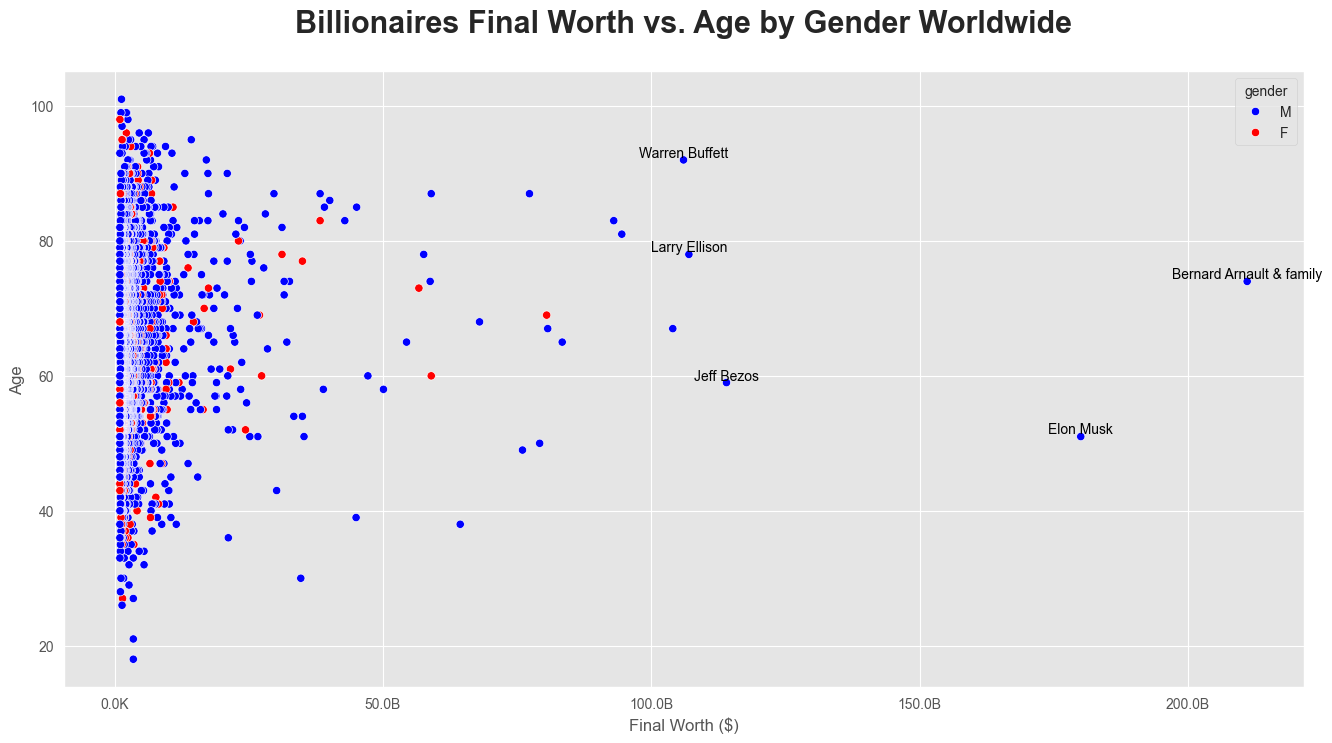

In [310]:
# Create the Scatterplot
plt.figure(figsize=(16, 8))
scatter_3_1 = sns.scatterplot(x='final_worth_usd',
                              y='age',
                              hue='gender',
                              palette={'M': 'blue', 'F': 'red'},
                              data=df)
plt.title('Billionaires Final Worth vs. Age by Gender Worldwide',
          fontweight='bold',
          fontsize=22,
          y=1.05)
scatter_3_1.set(xlabel='Final Worth ($)', ylabel='Age')

scatter_3_1.set_xticklabels([readable_numbers(x) for x in scatter_3_1.get_xticks()])

# Add text annotations for top 5 persons
top_5_billionaires = df.nlargest(5, 'final_worth_usd')
for _, person in top_5_billionaires.iterrows():
    plt.text(person['final_worth_usd'], person['age'], person['person_name'], fontsize=10, color='black', ha='center', va='bottom')

file_name_3_1 = "Billionaires_Final_Worth_vs_Age_by_Gender_Worldwide_M.png"
all_plots.append((scatter_3_1, file_name_3_1))
plt.show()

<a id="country_wealth_source_hist"></a>
## 3.2 Billionaires Count by Top Countries Worldwide and Wealth Source | Histogram

In [311]:
# Create a list of top 20 countries with most billionaires
top_countries = df['country'].value_counts().head(20).index.tolist()
top_countries

['United States',
 'China',
 'India',
 'Germany',
 'Russia',
 'United Kingdom',
 'Switzerland',
 'Italy',
 'Singapore',
 'Australia',
 'Brazil',
 'Canada',
 'Japan',
 'France',
 'South Korea',
 'Sweden',
 'Turkey',
 'Thailand',
 'Indonesia',
 'Spain']

In [312]:
# Filter the df based on the top 20 countries criteria
df_top_countries = df[df['country'].isin(top_countries)][['country', 'wealth_source']]
df_top_countries

,country,wealth_source
0,France,Inherited/Unearned
1,United States,Self-Made
2,United States,Self-Made
3,United States,Self-Made
4,United States,Self-Made
...,...,...
2378,China,Self-Made
2379,China,Self-Made
2380,United States,Inherited/Unearned
2381,China,Self-Made


In [313]:
# Create a pivot table with 'country' as the index and 'wealth_source' as the columns
# Use 'size' as the aggregation function to count the occurrences of each combination
# Fill NaN entries with 0 to represent countries where a certain wealth source category has no billionaires
df_pivot_wealth_source = pd.pivot_table(df_top_countries,
                                        index="country",
                                        columns="wealth_source",
                                        aggfunc='size').fillna(0).reset_index()
# Create a new column 'total' by summing up the counts of 'Inherited/Unearned' and 'Self-Made'
df_pivot_wealth_source['total'] = (
        df_pivot_wealth_source['Inherited/Unearned'] + df_pivot_wealth_source['Self-Made']
).astype(int)
df_pivot_wealth_source.sort_values(by='total', ascending=False)

wealth_source,country,Inherited/Unearned,Self-Made,total
19,United States,213.0,537.0,750
3,China,15.0,489.0,504
6,India,90.0,67.0,157
5,Germany,57.0,30.0,87
10,Russia,0.0,79.0,79
18,United Kingdom,22.0,56.0,78
15,Switzerland,30.0,42.0,72
8,Italy,31.0,24.0,55
11,Singapore,17.0,28.0,45
1,Brazil,26.0,17.0,43


In [314]:
# Merge the original DataFrame 'df_top_countries' with the pivot table 'df_pivot_wealth_source'
# on the 'country' column, keeping only the columns 'country' and 'total' from the pivot table
# Sort the resulting DataFrame by the 'total' column in descending order
df_wealth_source_merged = pd.merge(df_top_countries, df_pivot_wealth_source[['country', 'total']],
                                   on='country').sort_values(by='total', ascending=False)
df_wealth_source_merged

,country,wealth_source,total
1087,United States,Self-Made,750
448,United States,Self-Made,750
647,United States,Self-Made,750
648,United States,Inherited/Unearned,750
1522,United States,Self-Made,750
...,...,...,...
987,Spain,Inherited/Unearned,24
566,Indonesia,Self-Made,24
1948,Indonesia,Inherited/Unearned,24
555,Indonesia,Self-Made,24


In [315]:
df_top_country_counts = df_wealth_source_merged[['country', 'total']].drop_duplicates(subset=['country']).reset_index(
    drop=True)
df_top_country_counts

,country,total
0,United States,750
1,China,504
2,India,157
3,Germany,87
4,Russia,79
5,United Kingdom,78
6,Switzerland,72
7,Italy,55
8,Singapore,45
9,Australia,43


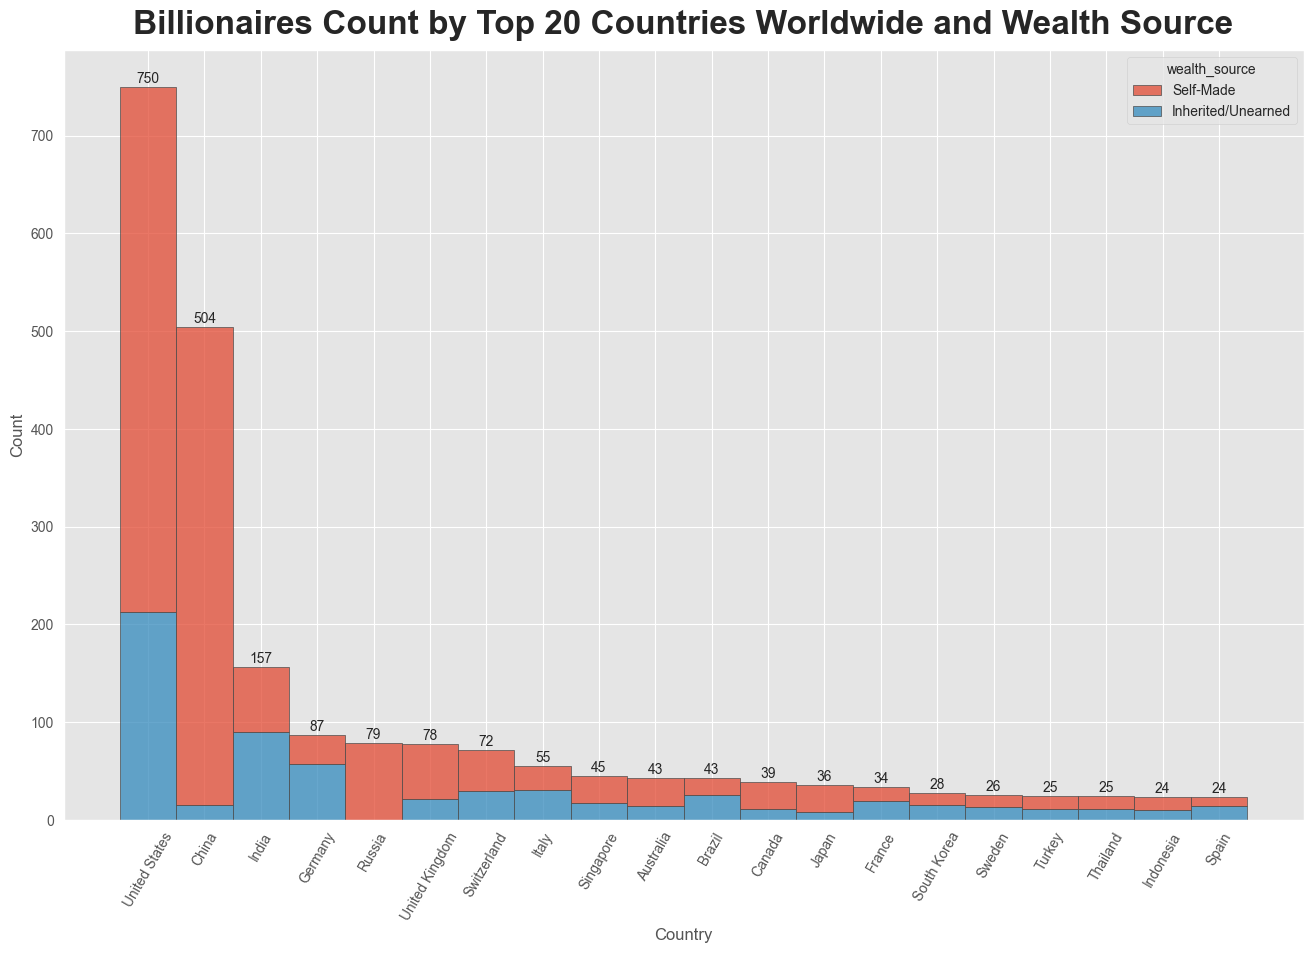

In [316]:
# Create the histplot
plt.figure(figsize=(16, 10))
hist_plot_3_2 = sns.histplot(
    data=df_wealth_source_merged,
    x="country",
    hue="wealth_source",
    edgecolor=".3",
    multiple='stack',
    linewidth=.5,
    stat='count'
)
plt.xticks(rotation=60)
hist_plot_3_2.set_title("Billionaires Count by Top 20 Countries Worldwide and Wealth Source",
                        fontsize=24,
                        fontweight='bold',
                        y=1.01)
hist_plot_3_2.set_ylabel("Count")
hist_plot_3_2.set_xlabel("Country")

# Add labels for total count
for index, row in df_top_country_counts.iterrows():
    country = row['country']
    total_count = row['total']
    plt.text(country, total_count + 1, str(total_count), ha='center', va='bottom')

file_name_3_2 = "Billionaires_Count_by_Top_20_Countries_Worldwide_and_Wealth_Source_M.png"
all_plots.append((hist_plot_3_2, file_name_3_2))
plt.show()

<a id="industries_age_gender_violin"></a>
## 3.3 Billionaires per Industry, Age and Gender | Violin Plot

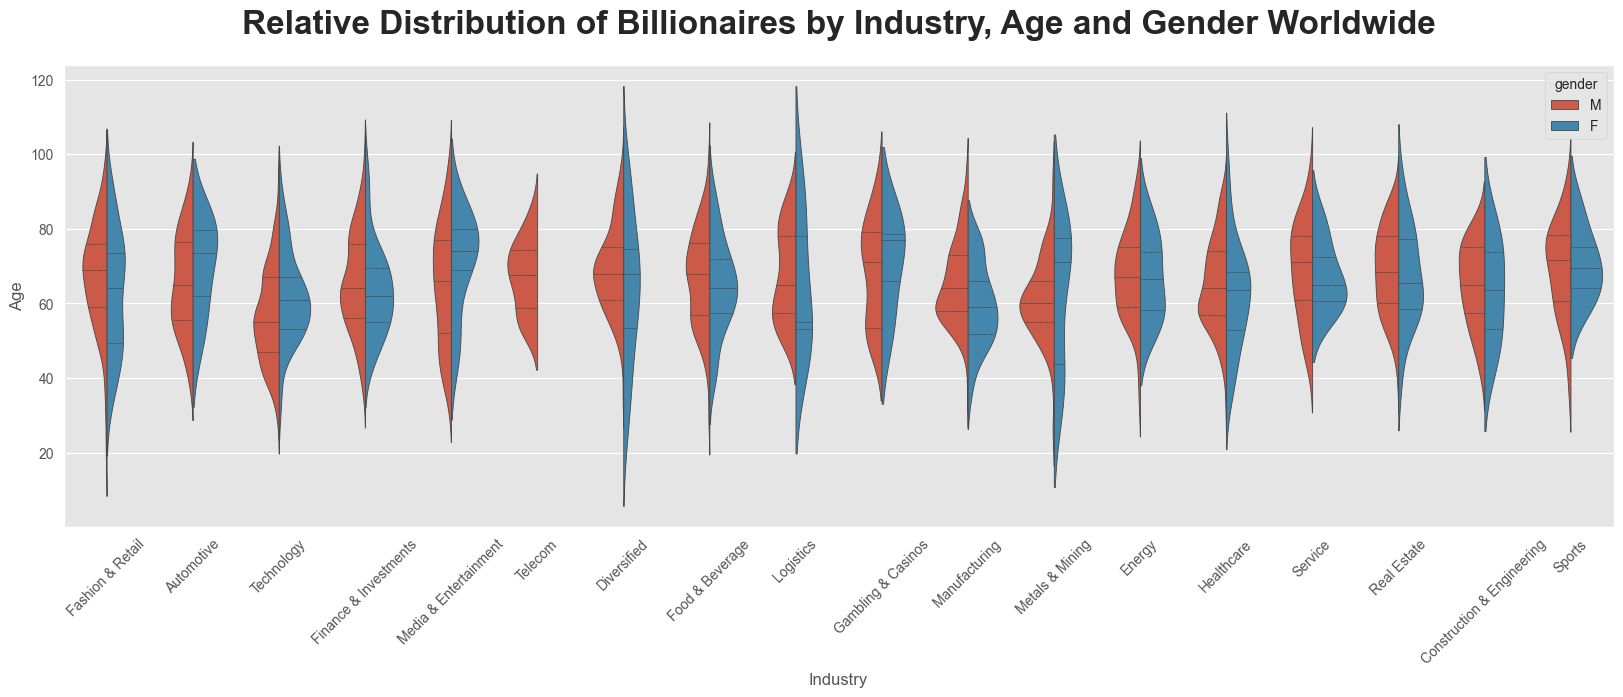

In [317]:
# Create the Violinplot 
plt.figure(figsize=(20, 6))
violin_plot_3_3 = sns.violinplot(data=df,
                                 x="industries",
                                 y="age",
                                 hue='gender',
                                 inner="quart",
                                 split=True)
violin_plot_3_3.set_title("Relative Distribution of Billionaires by Industry, Age and Gender Worldwide",
                          y=1.05,
                          fontsize=24,
                          fontweight="bold")
violin_plot_3_3.set_ylabel("Age")
violin_plot_3_3.set_xlabel("Industry")
plt.xticks(rotation=45)

file_name_3_3 = "Relative_Distribution_of_Billionaires_by_Industry_Age_and_Gender_Worldwide_M.png"
all_plots.append((violin_plot_3_3, file_name_3_3))
plt.show()

<a id="avg_final_worth_global_region_industries_facet"></a>
## 3.4 International Billionaire Average Final Worth by Global Region and Industry | Facet Grid

In [318]:
# Dictionary mapping countries to their respective global regions
country_to_global_region_dict = {
    'France': 'West Europe',
    'United States': 'North America',
    'Mexico': 'North America',
    'India': 'Asia',
    'Spain': 'West Europe',
    'China': 'Asia',
    'Canada': 'North America',
    'Germany': 'West Europe',
    'Switzerland': 'West Europe',
    'Belgium': 'West Europe',
    'Hong Kong': 'Asia',
    'Austria': 'West Europe',
    'Japan': 'Asia',
    'United Kingdom': 'West Europe',
    'Australia': 'Oceania',
    'Indonesia': 'Asia',
    'United Arab Emirates': 'Asia',
    'Russia': 'East Europe',
    'Chile': 'South America',
    'Monaco': 'West Europe',
    'Czech Republic': 'East Europe',
    'Sweden': 'West Europe',
    'Thailand': 'Asia',
    'Uzbekistan': 'Asia',
    'Singapore': 'Asia',
    'Nigeria': 'Africa',
    'Israel': 'Asia',
    'Italy': 'West Europe',
    'South Africa': 'Africa',
    'Brazil': 'South America',
    'Malaysia': 'Asia',
    'South Korea': 'Asia',
    'New Zealand': 'Oceania',
    'Philippines': 'Asia',
    'Taiwan': 'Asia',
    'Norway': 'West Europe',
    'Egypt': 'Africa',
    'Denmark': 'West Europe',
    'Eswatini (Swaziland)': 'Africa',
    'Colombia': 'South America',
    'Netherlands': 'West Europe',
    'Poland': 'East Europe',
    'Bahamas': 'North America',
    'Ukraine': 'East Europe',
    'Cayman Islands': 'North America',
    'Greece': 'West Europe',
    'Turkey': 'Asia',
    'Argentina': 'South America',
    'Georgia': 'East Europe',
    'Portugal': 'West Europe',
    'Kazakhstan': 'Asia',
    'Algeria': 'Africa',
    'Vietnam': 'Asia',
    'Latvia': 'East Europe',
    'Finland': 'West Europe',
    'Bermuda': 'North America',
    'Luxembourg': 'West Europe',
    'British Virgin Islands': 'North America',
    'Cambodia': 'Asia',
    'Lebanon': 'Asia',
    'Oman': 'Asia',
    'Ireland': 'West Europe',
    'Cyprus': 'Asia',
    'Guernsey': 'West Europe',
    'Liechtenstein': 'West Europe',
    'Turks and Caicos Islands': 'North America',
    'Romania': 'East Europe',
    'Qatar': 'Asia',
    'Uruguay': 'South America',
    'Nepal': 'Asia',
    'Slovakia': 'East Europe',
    'Morocco': 'Africa',
    'Hungary': 'East Europe',
    'Tanzania': 'Africa',
    'Bahrain': 'Asia',
    'Peru': 'South America',
    'Andorra': 'West Europe',
    'Armenia': 'East Europe',
    'NaN': 'Unknown'
}

In [319]:
# Create a new column 'global_region' by mapping the 'country' column using the provided dictionary
df['global_region'] = df['country'].replace(country_to_global_region_dict)
# Verify that the replacement worked for every country
df.query('country == global_region')

,rank,final_worth_usd,person_name,age,country,country_of_citizenship,city,industries,wealth_source,gender,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_usd,total_tax_rate_country,population_country,final_worth_usd_formatted,global_region


In [320]:
# Group the DataFrame by 'industries' and 'global_region', calculate the mean of 'final_worth_usd', and reset the index
avg_final_worth_per_global_region = df.groupby(['industries', 'global_region'])['final_worth_usd'].mean().reset_index()
avg_final_worth_per_global_region

,industries,global_region,final_worth_usd
0,Automotive,Asia,4.629545e+09
1,Automotive,North America,1.882500e+10
2,Automotive,West Europe,6.792308e+09
3,Construction & Engineering,Africa,7.400000e+09
4,Construction & Engineering,Asia,1.876923e+09
...,...,...,...
94,Telecom,Asia,4.200000e+09
95,Telecom,East Europe,1.700000e+09
96,Telecom,North America,1.602857e+10
97,Telecom,Oceania,1.500000e+09


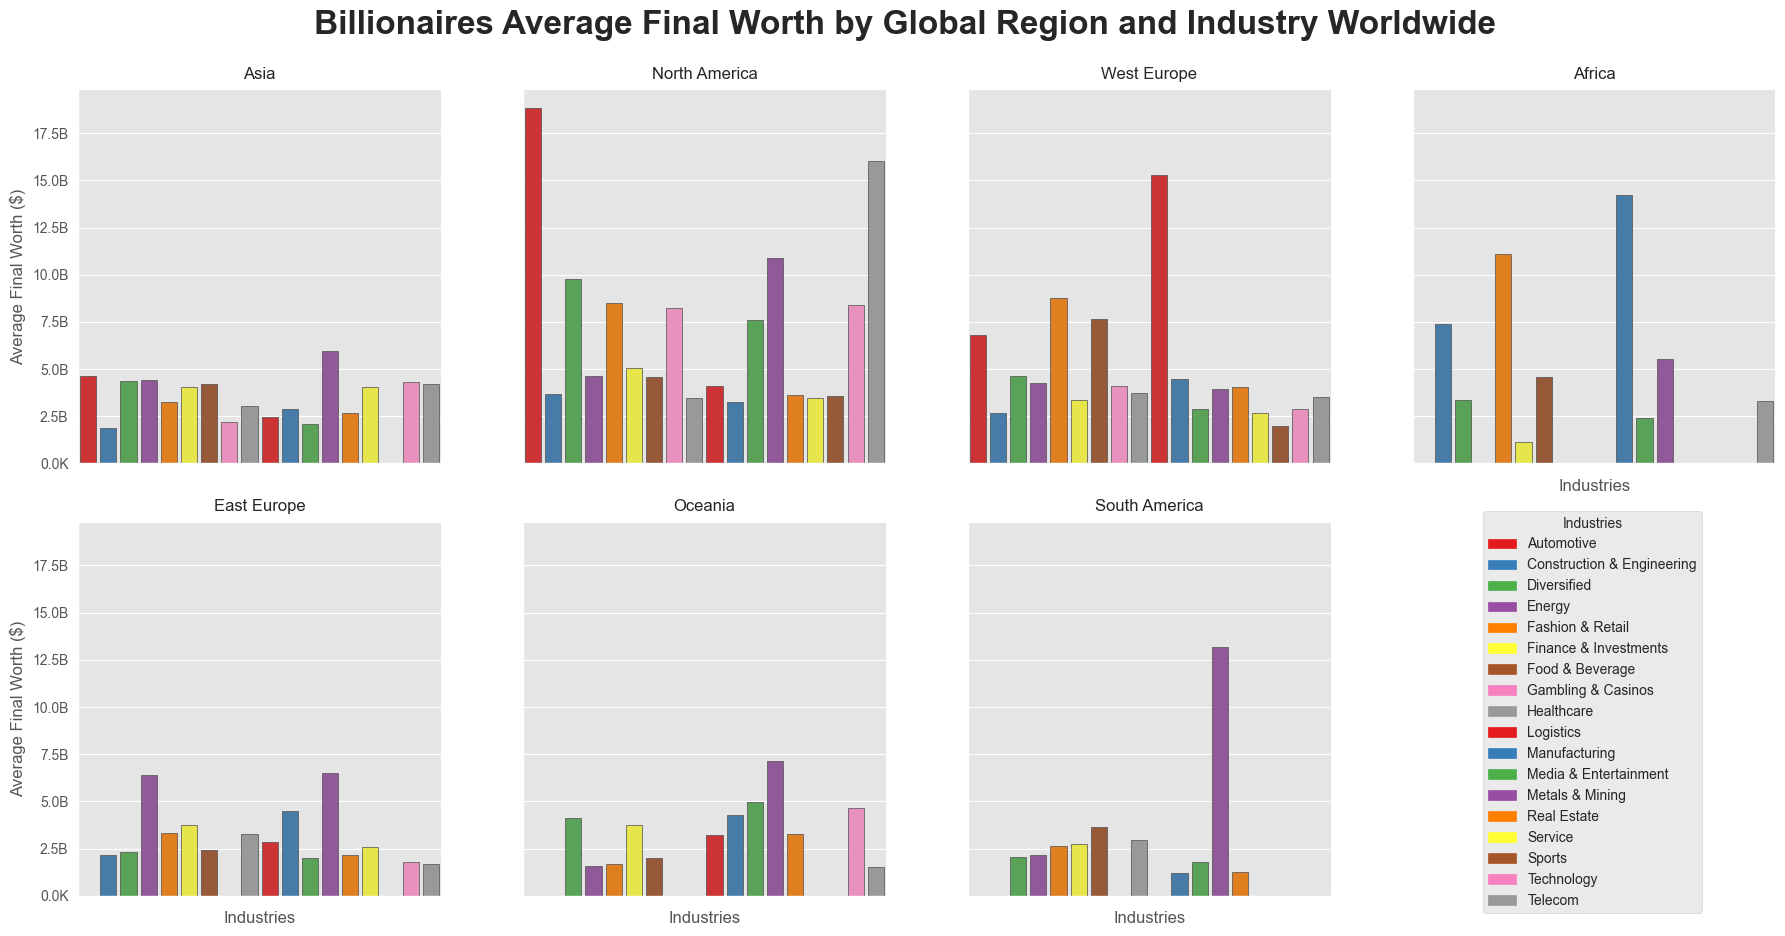

In [321]:
# Create a FacetGrid for each global region with a bar plot for average final worth in each industry
facet_grid_3_4 = sns.FacetGrid(data=avg_final_worth_per_global_region,
                               col='global_region',
                               col_wrap=4,
                               height=4.5,
                               hue='industries',
                               palette='Set1'
                               )


# Define a function to set individual subplot titles
def set_title(col_name):
    plt.gca().set_title(col_name)


# Map a bar plot for each industry by global region
facet_grid_3_4.map(sns.barplot,
                   'industries', 'final_worth_usd',
                   edgecolor=".3",
                   order=avg_final_worth_per_global_region['industries'].unique()
                   ).set_titles("{col_name}", verticalalignment='bottom')

facet_grid_3_4.set_xticklabels(rotation=45)
facet_grid_3_4.set_axis_labels('Industries', 'Average Final Worth ($)')

# Adjust y-axis tick labels
plt.gca().set_yticklabels([readable_numbers(y) for y in plt.gca().get_yticks()])

# Create custom legend handles
handles = [mpatches.Patch(color=color,
                          label=label) for color, label in
           zip(sns.color_palette('Set1', n_colors=18), avg_final_worth_per_global_region['industries'].unique())]

# Add legend and adjust layout
plt.legend(handles=handles, title='Industries', bbox_to_anchor=(1.4, 1.05), loc='upper left')

# Set overall title
title = plt.suptitle("Billionaires Average Final Worth by Global Region and Industry Worldwide",
                     y=1.05,
                     fontweight='bold',
                     fontsize=24,
                     )

# Set individual subplot titles
facet_grid_3_4.set_titles(col_template="{col_name}", row_template="{row_name}", verticalalignment='bottom')

file_name_3_4 = "Billionaires_Average_Final_Worth_by_Global_Region_and_Industry_Worldwide_M.png"
all_plots.append((facet_grid_3_4, file_name_3_4))
plt.show()

<a id="corr_heatmap"></a>
## 3.5 Worldwide Billionaire Correlations between Economic and Demographic Indicators | Heatmap

In [322]:
# Select numerical columns excluding the 'rank' column and calculate the correlation matrix
corr_df = df.select_dtypes(exclude='object').drop('rank', axis=1).corr()
corr_df

,final_worth_usd,age,life_expectancy_country,gross_tertiary_education_enrollment_country,gross_primary_education_enrollment_country,gdp_country_usd,total_tax_rate_country,population_country
final_worth_usd,1.000000,0.061611,0.024380,0.065300,-0.010040,0.035914,-0.037038,-0.054723
age,0.061611,1.000000,0.023309,0.064680,0.066280,-0.074021,-0.157074,-0.174421
life_expectancy_country,0.024380,0.023309,1.000000,0.528540,-0.311766,-0.044281,-0.266597,-0.520507
gross_tertiary_education_enrollment_country,0.065300,0.064680,0.528540,1.000000,-0.302663,0.309582,-0.404795,-0.548400
gross_primary_education_enrollment_country,-0.010040,0.066280,-0.311766,-0.302663,1.000000,-0.367894,0.101205,0.019043
gdp_country_usd,0.035914,-0.074021,-0.044281,0.309582,-0.367894,1.000000,0.141162,0.433586
total_tax_rate_country,-0.037038,-0.157074,-0.266597,-0.404795,0.101205,0.141162,1.000000,0.648666
population_country,-0.054723,-0.174421,-0.520507,-0.548400,0.019043,0.433586,0.648666,1.000000


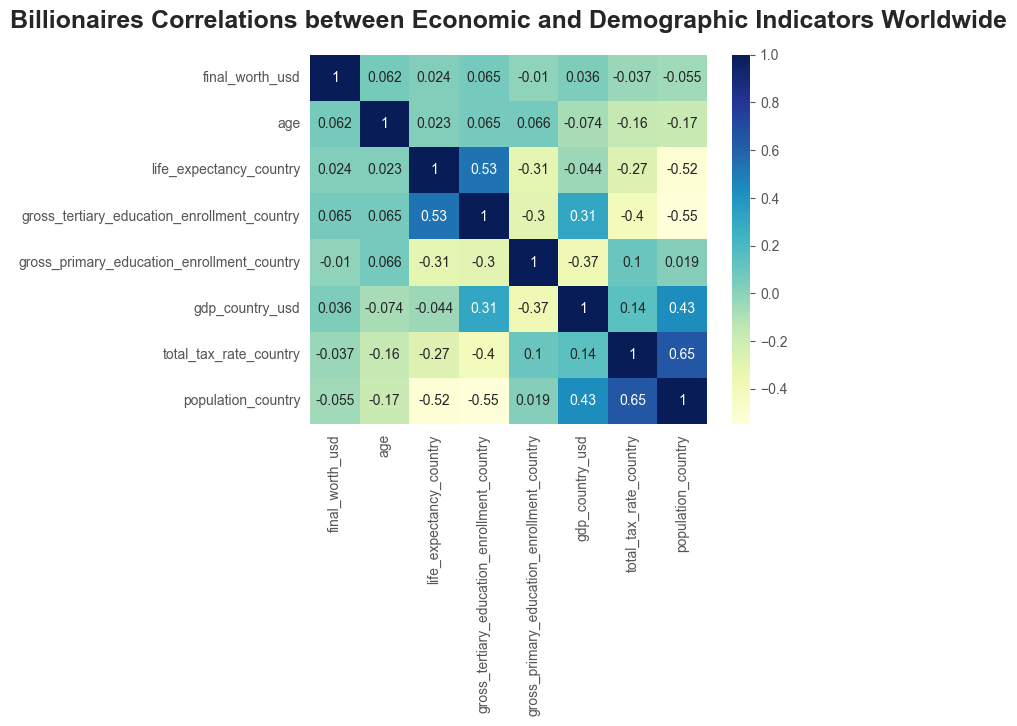

In [323]:
# Create a heatmap of the correlation matrix
heatmap_3_5 = sns.heatmap(data=corr_df,
                          annot=True,
                          cmap='YlGnBu')
heatmap_3_5.set_title("Billionaires Correlations between Economic and Demographic Indicators Worldwide",
                      y=1.05,
                      fontweight='bold',
                      fontsize=18)
file_name_3_5 = "Billionaires_Correlations_between_Economic_and_Demographic_Indicators_Worldwide_M.png"
all_plots.append((heatmap_3_5, file_name_3_5))
plt.show()

<a id="conclusion"></a>
# Conclusion 

In [324]:
for fig, file_name in all_plots:
    media_dir = "media/"
    if file_name.strip(" .png").endswith("U"):
        media_dir += "univariate_analysis"
    else:
        media_dir += "multivariate_analysis"

    # Create the directory if it doesn't exist
    os.makedirs(media_dir, exist_ok=True)
    fig.figure.savefig(f"{media_dir}/{file_name}", bbox_inches='tight')